# Exercises - Exploratory Analysis

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import env
import wrangle_zillow

from env import host, username, password
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

In [2]:
# Acquire
df = wrangle_zillow.get_zillow_data()

In [3]:
#Prepare
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
train.shape, validate.shape, test.shape

((29366, 63), (12586, 63), (10489, 63))

In [4]:
train.head()

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,propertylandusedesc
35122,261.0,12022380,2377102,1.0,NaN,NaN,5.0,4.0,None,11.0,...,2016.0,1696953.0,27435.67,None,NaN,6.037194e+13,50772,0.084693,2017-06-27,Single Family Residential
2380,261.0,12810885,1455738,1.0,NaN,NaN,3.0,4.0,None,8.0,...,2016.0,25446.0,1673.63,None,NaN,6.037409e+13,4826,-0.073995,2017-01-23,Single Family Residential
34278,261.0,12904344,2499805,NaN,NaN,NaN,2.0,5.0,None,5.0,...,2016.0,226335.0,4333.44,None,NaN,6.037401e+13,49435,-0.013206,2017-06-22,Single Family Residential
32940,261.0,14320257,1041179,NaN,NaN,NaN,4.5,4.0,None,NaN,...,2016.0,378224.0,10495.00,None,NaN,6.059063e+13,48798,0.390907,2017-06-21,Single Family Residential
18363,261.0,12325462,1483550,NaN,NaN,NaN,1.0,4.0,None,4.0,...,2016.0,70976.0,2447.45,None,NaN,6.037554e+13,28637,0.039706,2017-04-21,Single Family Residential


## Question about zillow dataset

- Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Is the logerror different for the number of bedrooms?

- Is the logerror different for the number of bathrooms?

- Does having a hot tub or spa effect the logerror?

- Does square footage effect logerror?

2. Answer those questions through a mix of statistical tests and visualizations.

## Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

<AxesSubplot:xlabel='fips', ylabel='logerror'>

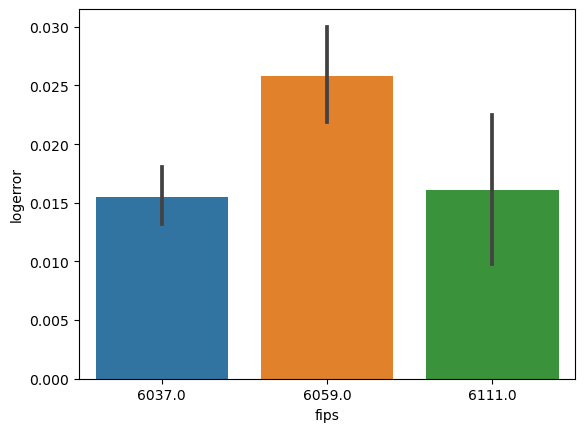

In [5]:
sns.barplot(data=train, x='fips', y='logerror')

6037 = LA, 6059 = Orange, 6111 = Ventura  

***Takeaways***

- Orange county has the highest logerror.
- LA and Ventura counties have the same amount of logerror.

## Is the logerror different for the number of bedrooms?

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

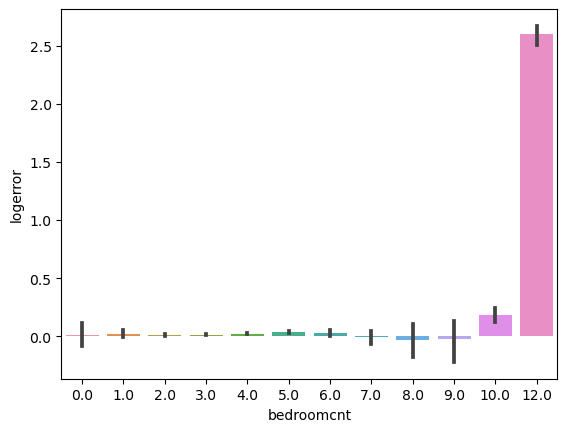

In [6]:
sns.barplot(data=train, x='bedroomcnt', y='logerror')

***Takeaways***

- 12 bedrooms has by far the greatest logerror.
- 10 bedrooms has the next greatest logerror, but significantly less than 12 bedrooms.
- The logerror for bedrooms from 0-9 are almost zero, this tells me that bedrooms is not a significant driver of logerror and than 10 and 12 bedrooms are outliers and should be removed.

## Is the logerror different for the number of bathrooms?

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

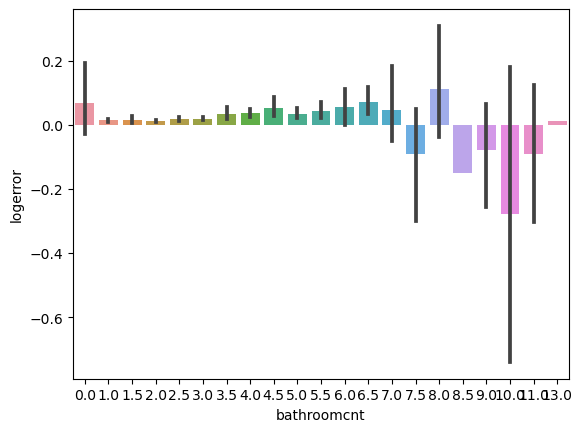

In [7]:
sns.barplot(data=train, x='bathroomcnt', y='logerror')

***Takeaways***

- After 7.5 bathrooms the logerror significantly increases.
- As the number of bathrooms increase the logerror increases as well.

## Does having a hot tub or spa effect the logerror?

<AxesSubplot:xlabel='hashottuborspa', ylabel='logerror'>

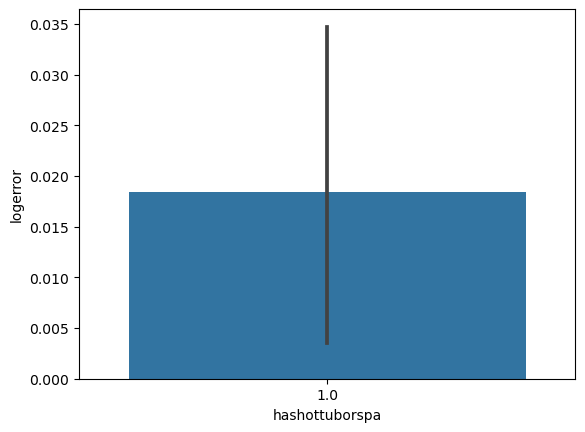

In [8]:
sns.barplot(data=train, x='hashottuborspa', y='logerror')

***Takeaways***

- The minimal ammount of properties with a hot tub or spa makes it difficult to determine if this area effects logerror.

## Does square footage effect logerror?

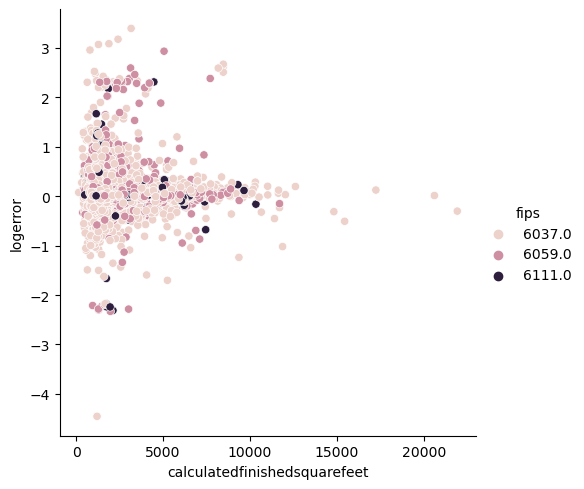

In [18]:
sns.relplot(
    data=train,
    x="calculatedfinishedsquarefeet", y="logerror",
    hue="fips")


***Takeaways***

- It would seem that the outliers are skewing the data and creating large bins for the square footage.
- Using fips shows that a majority of the properties are in the 6037 region.